In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Leitura dos datasets de treino e teste e criação do df de resposta
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_resposta = pd.DataFrame()

In [3]:
# Selecionar somente valores inteiros e floats
df_test = df_test.select_dtypes(include=['int64','float64'])

In [4]:
var = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
df_test[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


In [5]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

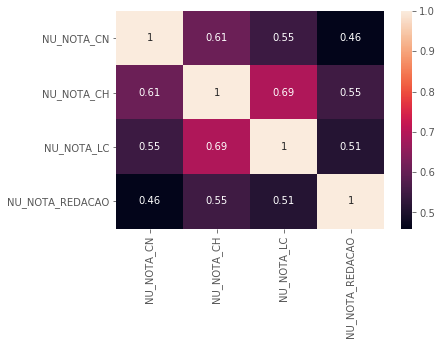

In [6]:
corr = df_train[features].corr()
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

plt.show()

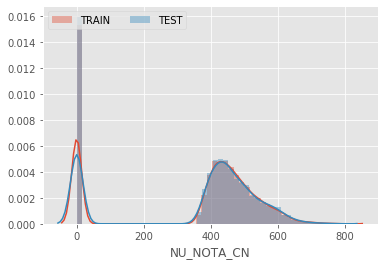

In [7]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [8]:
df_test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [9]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64

In [10]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [11]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [12]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

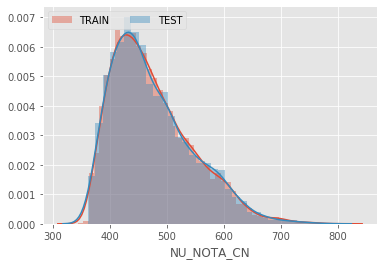

In [13]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [14]:
# Salvar os dados das inscrições
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

KeyError: 'NU_INSCRICAO'

In [ ]:
# o que queremos descobrir neste estudo ??
y = df_train['NU_NOTA_MT']

In [ ]:
# o que levaremos em consideração para treinar o modelo, e "prever" o resultado desejado
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
x_train = df_train[features]

A padronização é o processo de subtrair os meios de cada recurso e, em seguida, dividir pelos desvios padrão do recurso.
Trata-se de um requisito comum para tarefas de aprendizado de máquina. 
Muitos algoritmos assumem que todos os recursos estão centralizados em torno de zero e têm aproximadamente a mesma variação.

Usaremos um recurso no Scikit-Learn chamado API de transformação.
Segundo o blog EliteDataScience, esse recurso permite que você “ajuste” uma etapa de pré-processamento usando os dados de treinamento da mesma maneira que você ajustaria um modelo e, em seguida, use a mesma transformação em conjuntos de dados futuros.
Como funciona esse processo:

Ajuste o transformador ao conjunto de treinamento (salvando as médias e os desvios padrão)
Aplique o transformador ao conjunto de treinamento (dimensionando os dados de treinamento)
Aplique o transformador ao conjunto de teste (usando as mesmas médias e desvios padrão)
Isso torna sua estimativa final do desempenho do modelo mais realista e permite inserir suas etapas de pré-processamento em um pipeline de validação cruzada.

In [ ]:
# Ajustando o Transformer API
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
# Configuramos o objeto scaler com as médias e desvios padrão salvos para cada recurso no conjunto de treinamento. 
# Vamos testar aplicando aos dados de treinamento:

X_train_scaled = scaler.transform(x_train)

In [ ]:
# Vamos selecionar os dados de teste contendo somente as features necessárias a análise:
x_test = df_test[features]

Configuraremos agora o pipeline para realizar a validação cruzada mais a frente simplesmente declarando o objeto de classe da seguinte forma: 

Criando um um pipeline de modelagem que primeiro transforma e normaliza os dados usando o StandardScaler() e depois se ajusta a um modelo usando um regressor de floresta aleatório.

In [ ]:
#n_estimators=100 (número de nós) , n_jobs=-1 ( todo o processamento possível) , warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

Declaração de hiperparâmetros para ajustar o modelo: 
Segundo o tutorial do EliteDataScience, existem dois tipos de parâmetros com os quais precisamos nos preocupar: parâmetros de modelo e hiperparâmetros . 
Os parâmetros dos modelos podem ser aprendidos diretamente dos dados (isto é, coeficientes de regressão), enquanto os hiperparâmetros não podem.
Os hiperparâmetros expressam informações estruturais “de nível superior” sobre o modelo e são normalmente definidos antes do treinamento do modelo.
Exemplo: 

Hiperparâmetros de floresta aleatórios
Como exemplo, vamos pegar nossa floresta aleatória para regressão: Dentro de cada árvore de decisão, o computador pode decidir empiricamente onde criar ramificações com base no erro de média quadrática (MSE) ou no erro médio absoluto (MAE). Portanto, as localizações das filiais reais são parâmetros do modelo .
No entanto, o algoritmo não sabe qual dos dois critérios, MSE ou MAE, deve usar. O algoritmo também não pode decidir quantas árvores incluir na floresta. Estes são exemplos de hiperparâmetros que o usuário deve definir.

In [ ]:
# max_features : O número de features a considerar quando pesquisar pela melhor separação (testará as 3 opções e identificará a melhor para o modelo)
# max_depth :  Profundidade máxima da árvore de decisão. Se None (nenhuma), os nós serão expandidos até acabar as folhas ou até que elas contenham o mínimo valor de amostras possível.
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [ ]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train_scaled, y)

In [ ]:
pred_notas = clf.predict(x_test)

In [ ]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)